## Importing Libraries

In [1]:
!pip install opencv-python


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2

from PIL import Image

from tensorflow import keras
import tensorflow.keras.layers as k

from tqdm import tqdm

## Data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img

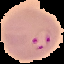

In [3]:
load_img(r"C:\Users\cell_images\Not Healthy",target_size=(64,64))

In [4]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)

In [5]:
image_dir = r"C:\Users\Deep Learning\cell_images"
size = 64
dataset = []
label = []

In [6]:
parasitized_img = os.listdir(image_dir+"\\Not Healthy")

for i,img_name in enumerate(tqdm(parasitized_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + "\\Not Healthy\\" + img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size , size))
        
        dataset.append(np.array(image))
        label.append(0)

100%|███████████████████████████████████████████████████████████████████████████| 13780/13780 [01:10<00:00, 196.43it/s]


In [7]:
uninfected_img = os.listdir(image_dir+"\\Healthy")

for i,img_name in enumerate(tqdm(uninfected_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + "\\Healthy\\" + img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size , size))
        
        dataset.append(np.array(image))
        label.append(1)

100%|███████████████████████████████████████████████████████████████████████████| 13780/13780 [01:00<00:00, 227.20it/s]


In [8]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain,xtest,ytrain,ytest = train_test_split(dataset,to_categorical(np.array(label)),test_size = 0.2 ,random_state = 0)

### CNN Architecture

In [11]:
Input_shape = (size,size,3)

inp = k.Input(shape = Input_shape)

conv1 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(inp)
pool1 = k.MaxPool2D(pool_size = (2,2))(conv1)
norm1 = k.BatchNormalization(axis = -1)(pool1)
drop1 = k.Dropout(rate = 0.2)(norm1)

conv2 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop1)
pool2 = k.MaxPool2D(pool_size = (2,2))(conv2)
norm2 = k.BatchNormalization(axis = -1)(pool2)
drop2 = k.Dropout(rate = 0.2)(norm2)

conv3 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop2)
pool3 = k.MaxPool2D(pool_size = (2,2))(conv3)
norm3 = k.BatchNormalization(axis = -1)(pool3)
drop3 = k.Dropout(rate = 0.2)(norm3)

flat = k.Flatten()(drop3)

hidden1 = k.Dense(512,activation="relu")(flat)
norm3   = k.BatchNormalization(axis=-1)(hidden1)
drop3   = k.Dropout(rate=0.2)(norm3)

hidden2 = k.Dense(256,activation="relu")(drop3)
norm4   = k.BatchNormalization(axis=-1)(hidden2)
drop4   = k.Dropout(rate=0.2)(norm4)

out = k.Dense(2, activation='sigmoid')(drop4)


In [12]:
model = keras.Model(inputs = inp , outputs = out)
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0     

In [13]:
history = model.fit(np.array(xtrain),ytrain,
                   batch_size= 64,verbose=1,epochs = 10,validation_split=0.1,shuffle=False)

Epoch 1/10
311/311 [==============================] - 47s 149ms/step - loss: 0.5126 - accuracy: 0.7714 - val_loss: 0.8871 - val_accuracy: 0.8190
Epoch 2/10
311/311 [==============================] - 45s 144ms/step - loss: 0.2238 - accuracy: 0.9202 - val_loss: 0.5353 - val_accuracy: 0.8676
Epoch 3/10
311/311 [==============================] - 47s 151ms/step - loss: 0.1783 - accuracy: 0.9371 - val_loss: 0.2602 - val_accuracy: 0.9147
Epoch 4/10
311/311 [==============================] - 44s 141ms/step - loss: 0.1567 - accuracy: 0.9461 - val_loss: 0.2629 - val_accuracy: 0.9265
Epoch 5/10
311/311 [==============================] - 47s 151ms/step - loss: 0.1419 - accuracy: 0.9508 - val_loss: 0.1702 - val_accuracy: 0.9410
Epoch 6/10
311/311 [==============================] - 45s 143ms/step - loss: 0.1324 - accuracy: 0.9527 - val_loss: 0.1626 - val_accuracy: 0.9401
Epoch 7/10
311/311 [==============================] - 44s 143ms/step - loss: 0.1226 - accuracy: 0.9563 - val_loss: 0.1381 - val_ac

In [14]:
print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(xtest),np.array(ytest))[1]*100))

173/173 [==============================] - 3s 17ms/step - loss: 0.1550 - accuracy: 0.9452
Test accuracy: 94.52%


In [17]:
model.save(r"C:\Users\Deep Learning\malaria_cell_detection.h5")